# [RobokitRS 라이브러리 수정하기]
- 주피터노트북에서 실행

## [설치된 라이브러리 확인]
- pip list

In [ ]:
pip list

In [ ]:
from RobokitRS.RobokitRS import *

In [ ]:
rs = RobokitRS()

C:\Users\lhacoding\AppData\Roaming\Python\Python311\site-packages\RobokitRS\pins


In [ ]:
help(rs)

In [ ]:
help(rs.port_open)

Help on method port_open in module RobokitRS.RobokitRS:

port_open(portname: str) method of RobokitRS.RobokitRS.RobokitRS instance
    Serialport open func
    
    Parameters
    --------
    portName
        Name of serialport
        (example : COM1)



### [1] port_open 메서드 살펴보기

```python
def port_open(self, portname:str):
        """
        Serialport open func
        
        Parameters
        --------
        portName
            Name of serialport
            (example : COM1)
        """
        # macos 사용을 위한 해당 항목 제거, 추후 os 확인 전처리기 추가
        # portname = portname.upper()
        # if "COM" not in portname:
        #     print("Portname value error. Portname should be a \'COM\' with number. Example : COM1")
        #     return

        self.serialPort = serial.Serial( portname, baudrate=115200)
        if self.serialPort.isOpen() == True:
            self.serialPort.close()
        self.serialPort.open()
        print("RSBoard serial port opend")

        self.__thread_init__()
        print("Thread init done")

        self.__init_robokitRS_th__()
        print("RSBoard init done")

        return True
```

### [2] 독스트링 수정하기

- C:\Users\lhacoding\AppData\Roaming\Python\Python311\site-packages\RobokitRS경로 열기
- RobokitRS.py파일 메모장으로 열기

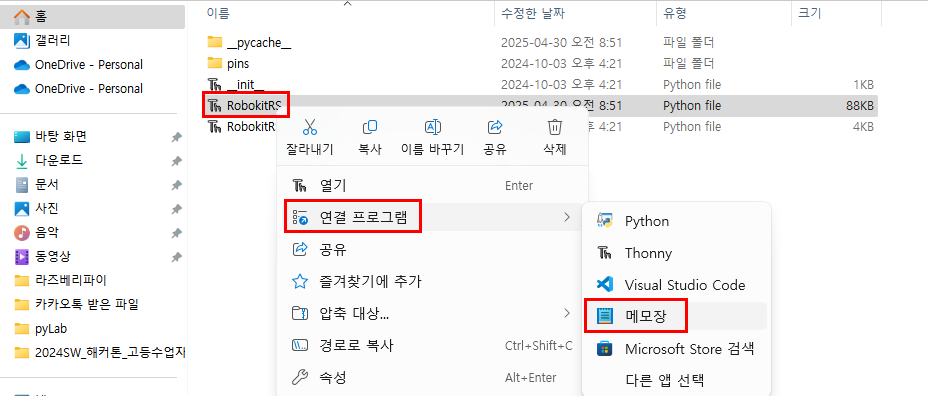

- 독스트링 수정하기

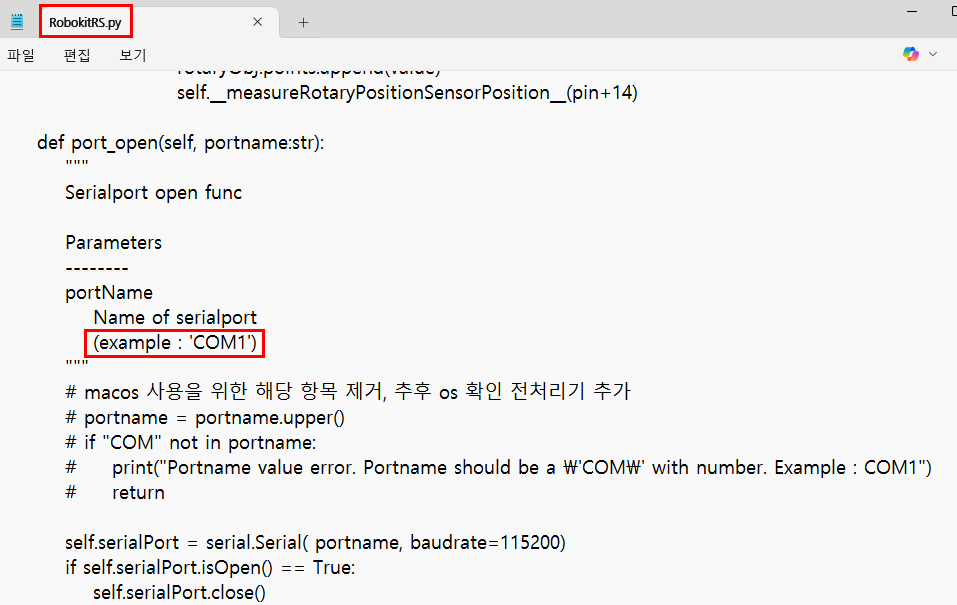

- 커널 재시작하기

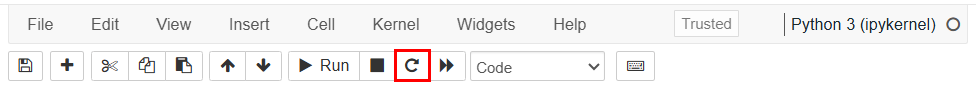

- 다시 import 하기

In [ ]:
from RobokitRS.RobokitRS import *

- 에러나는 경우 코드 수정

In [ ]:
C:\Users\lhacoding\AppData\Roaming\Python\Python311\site-packages\RobokitRS\RobokitRS.py:162: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if parseChar is not 0xF0:
C:\Users\lhacoding\AppData\Roaming\Python\Python311\site-packages\RobokitRS\RobokitRS.py:167: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if parseChar is not 0x01:
C:\Users\lhacoding\AppData\Roaming\Python\Python311\site-packages\RobokitRS\RobokitRS.py:183: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if parseChar is not 0xF7:
C:\Users\lhacoding\AppData\Roaming\Python\Python311\site-packages\RobokitRS\RobokitRS.py:205: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if parseChar is 0xF0:
C:\Users\lhacoding\AppData\Roaming\Python\Python311\site-packages\RobokitRS\RobokitRS.py:212: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if d is 0xF7:
C:\Users\lhacoding\AppData\Roaming\Python\Python311\site-packages\RobokitRS\RobokitRS.py:215: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if (data[0] is 0x01) and (data[3] is 0x09):
C:\Users\lhacoding\AppData\Roaming\Python\Python311\site-packages\RobokitRS\RobokitRS.py:215: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if (data[0] is 0x01) and (data[3] is 0x09):
C:\Users\lhacoding\AppData\Roaming\Python\Python311\site-packages\RobokitRS\RobokitRS.py:225: SyntaxWarning: "is" with a literal. Did you mean "=="?
  elif (data[0] is 0x63):
C:\Users\lhacoding\AppData\Roaming\Python\Python311\site-packages\RobokitRS\RobokitRS.py:233: SyntaxWarning: "is" with a literal. Did you mean "=="?
  elif parseChar is 0x90:
C:\Users\lhacoding\AppData\Roaming\Python\Python311\site-packages\RobokitRS\RobokitRS.py:239: SyntaxWarning: "is" with a literal. Did you mean "=="?
  elif parseChar is 0x91:

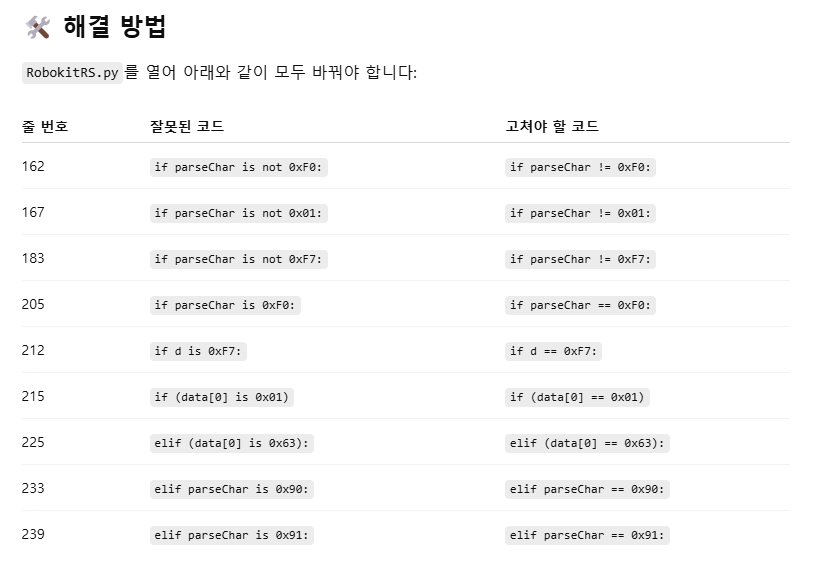

[수정된 코드]
- 원본 열어서 아래 메서드 복사후 기존 메서드 삭제 후 붙여넣기

In [ ]:
    def __serialParser__(self):
        parseChar = 0x00
        ins = 0x00
        leng = 0x00
        data = []

        while self.__connect_checked is False or self.__version_checked is False:
            if len(self.__serial_buf) <= 5:
                sleep(0)
                continue
            parseChar = self.__serial_buf.popleft()
            if parseChar != 0xF0:
                sleep(0)
                continue

            parseChar = self.__serial_buf.popleft()
            if parseChar != 0x01:
                sleep(0)
                continue

            ins = self.__serial_buf.popleft()
            leng = self.__serial_buf.popleft()

            while True:
                if len(self.__serial_buf) >= leng:
                    break
                sleep(0)

            for i in range(leng):
                data.append(self.__serial_buf.popleft())

            parseChar = self.__serial_buf.popleft()
            if parseChar != 0xF7:
                sleep(0)
                continue

            if ins == 0x7A:
                self.__connect_checked = True
            elif ins == 0x7F:
                self.__version_checked = True

            ins = 0x00
            leng = 0x00
            del data[:]

        while True:
            if self.kill:
                print("killed Serial Parser")
                return
            if len(self.__serial_buf) <= 3:
                sleep(0)
                continue

            parseChar = self.__serial_buf.popleft()
            if parseChar == 0xF0:
                while True:
                    if len(self.__serial_buf) <= 0:
                        sleep(0)
                        continue
                    d = self.__serial_buf.popleft()
                    data.append(d)
                    if d == 0xF7:
                        break

                if (data[0] == 0x01) and (data[3] == 0x09):
                    self.__gyro_data.angleX = (data[4] + ((data[5] & 0x01) << 7)) * (-1 if ((data[5] >> 4 & 0x01) == 1) else 1)
                    self.__gyro_data.angleY = (data[6] + ((data[7] & 0x01) << 7)) * (-1 if ((data[7] >> 4 & 0x01) == 1) else 1)
                    self.__gyro_data.angleZ = (data[8] + ((data[9] & 0x01) << 7)) * (-1 if ((data[9] >> 4 & 0x01) == 1) else 1)

                    self.__gyro_data.gyroX = (data[10] + ((data[11] & 0x01) << 7)) * (-1 if ((data[11] >> 4 & 0x01) == 1) else 1)
                    self.__gyro_data.gyroY = (data[12] + ((data[13] & 0x01) << 7)) * (-1 if ((data[13] >> 4 & 0x01) == 1) else 1)
                    self.__gyro_data.gyroZ = (data[14] + ((data[15] & 0x01) << 7)) * (-1 if ((data[15] >> 4 & 0x01) == 1) else 1)

                    self.__gyro_data.shake = (data[19] & 0x01)
                elif (data[0] == 0x63):
                    pin = data[1]
                    sonarLSB = data[2]
                    sonarMSB = data[3]
                    self.__sonar_read_data[pin] = sonarMSB * 127 + sonarLSB
                    if SensorType.SONAR in self.__eventHandlerDic and self.__sonar_read_data[pin] != 508:
                        self.__eventHandlerDic[SensorType.SONAR](self.__sonar_read_data[pin])
                del data[:]
            elif parseChar == 0x90:
                digitalData = self.__serial_buf.popleft()
                digitalData2 = self.__serial_buf.popleft()
                for i in range(7):
                    self.__digital_read_data[i] = digitalData >> i & 0x01
                self.__digital_read_data[7] = digitalData2 & 0x01
            elif parseChar == 0x91:
                digitalData = self.__serial_buf.popleft()
                dummy = self.__serial_buf.popleft()
                for i in range(8):
                    self.__digital_read_data[i+8] = digitalData >> i & 0x01
            elif parseChar & 0x0F > -1 and parseChar & 0x0F < 16:
                pin = parseChar & 0x0F
                lsb = self.__serial_buf.popleft()
                msb = self.__serial_buf.popleft()
                value = (msb << 7) + lsb

                if pin > 5:
                    continue
                self.__analog_read_data[pin + 14] = value
                rotaryObj = self.__rotary_data[pin+14]
                if rotaryObj.enable == True:
                    if rotaryObj.firstValue == None:
                        rotaryObj.firstValue = value
                        rotaryObj.points = []

                        angle = self.__measureRotaryPositionSensorAngle__(pin+14)
                        if angle < 0:
                            angle += 360
                        rotaryObj.calibration = (rotaryObj.calibration % 360) - angle

                    length = len(rotaryObj.points)
                    if length == 0 or (int(rotaryObj.points[length -1]) != int(value)):
                        rotaryObj.points.append(value)
                        self.__measureRotaryPositionSensorPosition__(pin+14)

- 다시 import 하기

In [ ]:
from RobokitRS.RobokitRS import *

- 객체 생성

In [ ]:
rs = RobokitRS()

C:\Users\lhacoding\AppData\Roaming\Python\Python311\site-packages\RobokitRS\pins


- 독스트링 출력

In [ ]:
help(rs.port_open)

Help on method port_open in module RobokitRS.RobokitRS:

port_open(portname: str) method of RobokitRS.RobokitRS.RobokitRS instance
    Serialport open func
    
    Parameters
    --------
    portName
        Name of serialport
        (example : 'COM1')



### [3]  motor_write 메서드 살펴보기

```python
def motor_write(self, motorid:int, direction:int=0, speed:int=15):
        """DCMotor write func.

        Parameters
        --------
        motorID
            DCMotor's ID
            Motor1 : 0
            Motor2 : 1
            Motor3 : 2
            Motor4 : 3
        direction
            The direction of rotation
            CW : 0
            CCW : 1
        speed
            DCMotor's speed
            (min : 0, max : 15)
            """

        if motorid > 3 or motorid < 0:
            print('motorid value error. motorid value must be between 0 and 3')
            return
        if direction > 1 or direction < 0:
            print('direction value error. direction value must be 0 or 1')
            return
        if speed > 15 or speed < 0:
            print('speed value error. speed value must be between 0 and 15')
            return

        speed = speed * 17

        if motorid == 0:
            self.set_pin_mode(4,Modes.OUTPUT)
            self.set_pin_mode(5,Modes.OUTPUT)
        elif motorid == 1:
            self.set_pin_mode(6,Modes.OUTPUT)
            self.set_pin_mode(7,Modes.OUTPUT)
        elif motorid == 2:
            self.set_pin_mode(8,Modes.OUTPUT)
            self.set_pin_mode(9,Modes.OUTPUT)
        elif motorid == 3:
            self.set_pin_mode(10,Modes.OUTPUT)
            self.set_pin_mode(11,Modes.OUTPUT)

        protocol = ProtocolData()
        protocol.data.append(self.__START_SYSEX)
        protocol.data.append(0x00)
        protocol.data.append(0x02)
        protocol.data.append(0x02)
        protocol.data.append( int(speed % 128) )
        protocol.data.append( int(motorid) << 4 | int(direction) << 3 | int(speed / 128))
        protocol.data.append(self.__END_SYSEX)
        self.__protocol_buf.append(protocol)
```

### [4] motor_write2 만들기

#### 1) 모터 번호 수정

- motor_write 수정하여 motor_write2 만들기
- 모터 번호를 0,1,2,3 -> 1,2,3,4로 수정

In [ ]:
# 여기에 코드 수정하기
def motor_write2(self, motorid: int, direction: int = 0, speed: int = 15):
    """DCMotor write func.

    Parameters
    ----------
    motorid : int
        DCMotor's ID (1~4)
        Motor1 : 1
        Motor2 : 2
        Motor3 : 3
        Motor4 : 4
    direction : int
        The direction of rotation
        CW : 0, CCW : 1
    speed : int
        DCMotor's speed (0~15)
    """



#### 2) 방향을 0,1 -> CW, CCW 수정

- motor_write2 코드에서 방향을 CW : 0, CCW : 1 -> CW,CCW 그대로 사용하도록 코드 수정

In [ ]:
# 여기에 코드 수정하기
def motor_write2(self, motorid: int, direction: str = 'cw', speed: int = 15):
    """DCMotor write func.

    Parameters
    ----------
    motorid : int
        DCMotor's ID (1~4)
        Motor1 : 1
        Motor2 : 2
        Motor3 : 3
        Motor4 : 4
    direction : str
        The direction of rotation
        'cw'  : clockwise
        'ccw' : counter-clockwise
    speed : int
        DCMotor's speed (0~15)
    """


### [5]  motor_stop 메서드 살펴보기

```python
def motor_stop(self, motorid:int):
        """DCMotor write func.

        Parameters
        --------
        motorID
            DCMotor's ID
            Motor1 : 0
            Motor2 : 1
            Motor3 : 2
            Motor4 : 3
        """

        if motorid > 3 or motorid < 0:
            print('motorid value error. motorid value must be between 0 and 3')
            return
        
        self.motor_write(motorid,0,0)
```

### [6]  motor_stop2 만들기

#### 1) 모터 번호 수정

- motor_stop 수정하여 motor_stop2 만들기
- 모터 번호를 0,1,2,3 -> 1,2,3,4로 수정

In [ ]:
# 여기에 코드 수정하기
def motor_stop2(self, motorid: int):
    """DCMotor stop function.

    Parameters
    ----------
    motorid : int
        DCMotor's ID (1~4)
        Motor1 : 1
        Motor2 : 2
        Motor3 : 3
        Motor4 : 4
    """

#### 2) 방향을 0,1 -> CW, CCW 수정

- motor_stop2 코드에서 방향을 CW : 0, CCW : 1 -> CW,CCW 그대로 사용하도록 코드 수정

In [ ]:
# 여기에 코드 수정하기
def motor_stop2(self, motorid: int):
    """DCMotor stop function.

    Parameters
    ----------
    motorid : int
        DCMotor's ID (1~4)
        Motor1 : 1
        Motor2 : 2
        Motor3 : 3
        Motor4 : 4
    """


### [7]  motor_stop_all() 만들기

- 모든 모터 한꺼번에 정지하는 함수 만들기
- motor_stop_all()

In [ ]:
# 여기에 코드 작성하기
def motor_stop_all(self):
    """Stop all 4 DCMotors."""

    for motorid in range(□, □):  # 1부터 4까지
        self.motor_write2(□, □, □)

### [8] RobokitRS.py 파일 수정하기

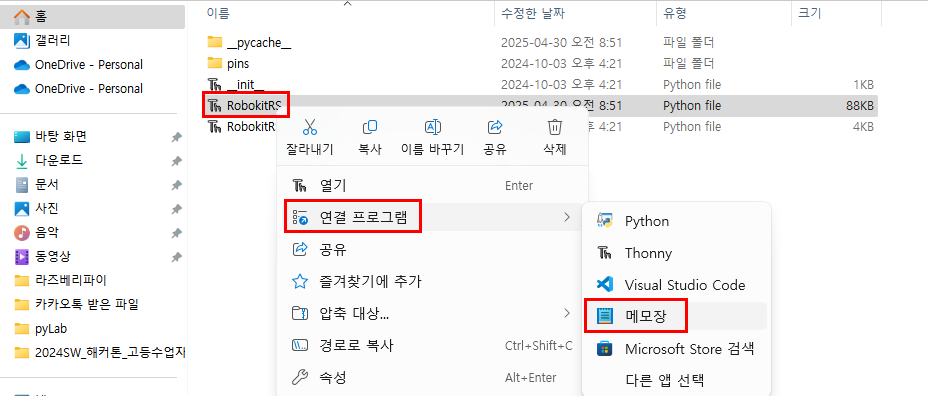

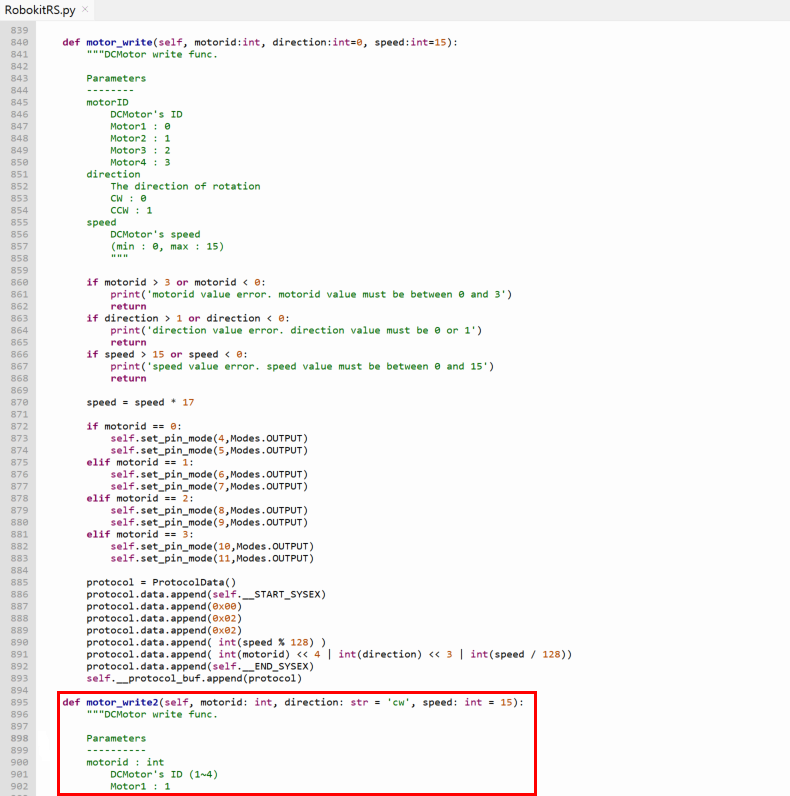

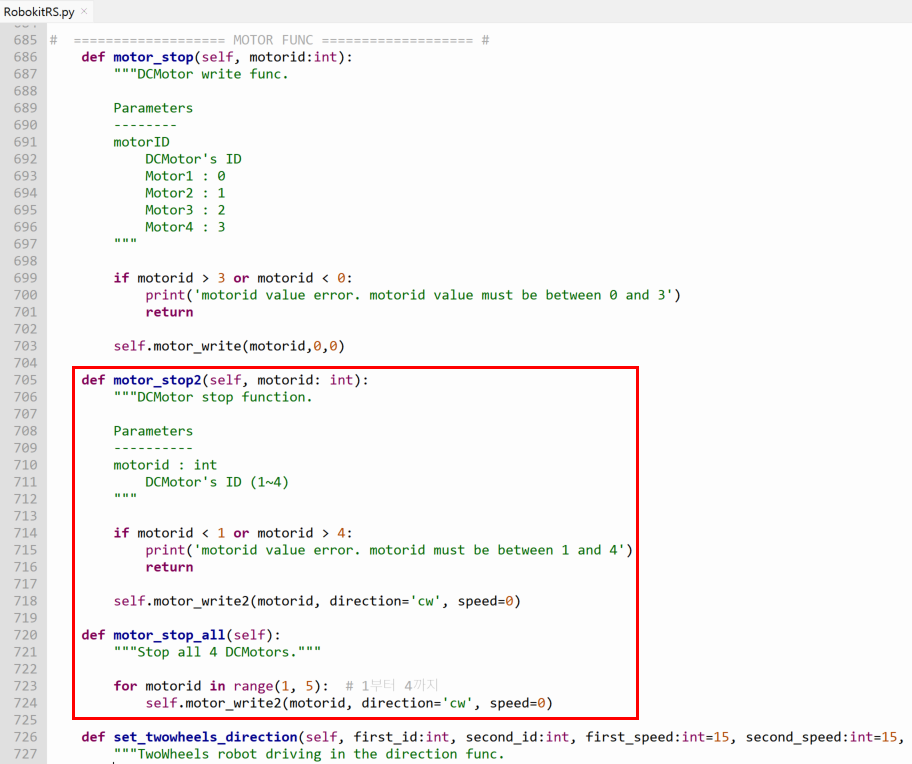

- 커널 재시작하기

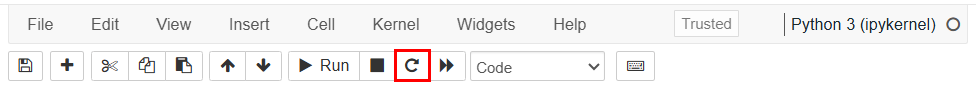

- 다시 import 하기

In [ ]:
from RobokitRS.RobokitRS import *

- 객체 생성

In [ ]:
rs = RobokitRS()

C:\Users\lhacoding\AppData\Roaming\Python\Python311\site-packages\RobokitRS\pins


In [ ]:
help(rs.motor_write)

In [ ]:
help(rs.motor_write2)

In [ ]:
help(rs.motor_stop)

In [ ]:
help(rs.motor_stop2)

In [ ]:
help(rs.motor_stop_all)

### [9] 수정한 메서드로 주행함수 만들기

In [ ]:
# 여기에 코드 작성
# 전진
def forward(speed=5):
    □

# 후진
def reverse(speed=5):
    □

# 정지
def stop():
    □

# 우측
def right(speed=5):
    □

# 좌측
def left(speed = 5):
    □

#우회전
def right_turn(speed = 5):
    □

#좌회전
def left_turn(speed = 5):
    □

In [ ]:
forward(10)
time.sleep(0.5)
reverse(10)
time.sleep(0.5)
stop()

In [ ]:
left(10)
time.sleep(0.5)
right(10)
time.sleep(0.5)
stop()

In [ ]:
right_turn(10)
time.sleep(0.5)
left_turn(10)
time.sleep(0.5)
stop()